In [82]:
!jupyter nbconvert pilot_analysis.ipynb --to slides --no-input --post serve

#note struggle to display md images, plotly table and pd summary (in a slide fragment)
    

[NbConvertApp] Converting notebook pilot_analysis.ipynb to slides
[NbConvertApp] Writing 467752 bytes to pilot_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Helena\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Helena\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Helena\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Helena\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "C:\Users\Helena\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\

# study 5:
## pilot
### Helena Blackmore

#### April 2021

### summary

In [41]:
import plotly
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

<module 'plotly.version' from 'C:\\Users\\Helena\\Anaconda3\\lib\\site-packages\\plotly\\version.py'>


In [42]:


figure_summary = go.Figure(data=[go.Table(header=dict(values=['', 'prefer beer', 'prefer NA', 'total'],
                                          line_color='aliceblue',
                fill_color='lightskyblue',
                ),
                 cells=dict(values=[['participants', '%', '"right choice" \n(last trial) ','%' ],
                                    [ 25 ,round((25/33)*100, 1) , mot_choiceB,round(mot_choiceB_perc,1) ], 
                                    [ 8 , round((8/33)*100, 1), mot_choiceNA, round(mot_choiceNA_perc,1)],
                                    [33 , 100, mot_total,round(mot_total_perc,1)]
                                   ]))
                     ])
plotly.offline.plot(figure_summary, filename = 'summary.html')
figure_summary.show()


![](summary.png)

## descriptive stats 

<div style="text-align: right"><h3> participants who prefer non-alcoholic beer | participants who chose regular beer at first trial </div> 

In [80]:

summary_NA=last_NA.describe()

summary_NA=summary_NA[['beer_amount', 'values.k']]

In [81]:

summary_beer=beer_last.describe()

summary_beer=summary_beer[['NA_amount', 'values.k']]

In [79]:
summary_both=pd.DataFrame.join(summary_beer, summary_NA, lsuffix='_beer', rsuffix='_NA')
summary_both.columns=['incentive (NA)','k (NA)', 'incentive (beer)', 'k (beer)']
summary_both

,incentive (NA),k (NA),incentive (beer),k (beer)
count,25.000000,25.000000,8.00000,8.000000
mean,56.070400,4.238147,5.15250,0.079792
std,41.750979,8.391437,5.02258,0.129420
min,0.090000,0.000110,0.06000,0.001940
25%,6.000000,0.009490,2.54250,0.002998


In [4]:
# ************ RUN ALL BELOW FIRST!****************************

In [5]:
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt


In [6]:
# readin data

consent=pd.read_csv('..\data\s5_pilot_consent_tidy.csv')
debrief=pd.read_csv("..\data\s5_pilot_debrief_tidy.csv")
beer_stair=pd.read_csv("..\data\hb_pilot_s5_beer_stair_tidy.csv")
ddt=pd.read_csv("..\data\hb_pilot_s5_ddt_tidy.csv")
code=pd.read_csv("..\data\hb_pilot_s5_confirmation_code_tidy.csv")



In [7]:
# beer stair data long ->
#beer_stair=beer_stair.drop('build', 1)

beer_stair=beer_stair.fillna('non-alcoholic')
#beer_stair.head()






In [8]:
#2 smaller data sets: one with NA as first choice,one with beer as first choice

# those who chose beer on first or second trial:
#create a list of pp numbers  who chose beer in the first trial

firstTrials=[1,2]
x=0
beer_pplist=[]

for x in range(beer_stair.shape[0]):

    if beer_stair.loc[x,'trialnum'] in firstTrials and beer_stair.loc[x,'response']=='beer':
        beer_pplist.append(beer_stair.loc[x,'subject'])
        x=x+1
#print(beer_pplist)      

In [9]:
# dataset with pp who chose NA beer
na_pplist=[]
x=0

for x in range(beer_stair.shape[0]):

    if beer_stair.loc[x,'trialnum']==2 and beer_stair.loc[x,'response']=='NA_base':
        na_pplist.append(beer_stair.loc[x,'subject'])
    x=x+1
        
na_pplist=na_pplist[-8:] #this contains duplicates, I only want those that are duplicated, ie. non-alcoholic beer was not chosen by mistake
na_pplist



# table_napp=pd.Series(na_pplist).value_counts()

# na_pplist=Series(na_pplist)

# new_flist=[]
# dupid=na_pplist.duplicated(keep='last')
# x=0
# for x in range(len(na_pplist)):
#     if dupid[x]:
#         new_flist.append(na_pplist[x])
#         x=x+1
# new_flist
# na_pplist
#new_flist now has those who chose non-alcohpolic beer        
#print(new_flist) #hallefuckingluja! 


[111412, 180930, 473308, 542088, 699079, 745353, 853105, 950720]

In [10]:
#filter pp that are in the new_flist!

prefer_beer=beer_stair.loc[beer_stair['subject'].isin(beer_pplist)]

#prefer_beer

In [11]:
#filter pp who are in the new_flist (those who chose NA beer)

prefer_NA=beer_stair.loc[beer_stair['subject'].isin(na_pplist)]
#prefer_NA


In [12]:
# rename columns stimulus item 1 and stimulus item 2 to amount_beer and amount_na

prefer_beer.rename(columns = {'stimulusitem1':'beer_amount', 'stimulusitem2':'NA_amount'}, inplace = True)
#prefer_beer.columns 

prefer_NA.rename(columns={'stimulusitem1':'beer_amount', 'stimulusitem2':'NA_amount'}, inplace=True)
#prefer_NA.columns

C:\Users\Helena\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
# sort out 'amount'column

## for beer dataset
prefer_beer['NA_amount'] = prefer_beer['NA_amount'].str.replace("non-alcoholic beer \(0.0% ABV\) and £", '', regex=True) 
prefer_beer['NA_amount'] = prefer_beer['NA_amount'].str.replace("non-alcoholic beer \(0.0% ABV\)", '0', regex=True)

prefer_beer['beer_amount'] = prefer_beer['beer_amount'].str.replace("regular beer \(4.5%\) and £", '', regex=True)
prefer_beer['beer_amount'] = prefer_beer['beer_amount'].str.replace("regular beer \(4.5%\)", '0', regex=True) 


#prefer_beer

C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [14]:
#same for NA choice datatset
prefer_NA['beer_amount'] = prefer_NA['beer_amount'].str.replace("regular beer \(4.5% ABV\) and £", '', regex=True)
prefer_NA['beer_amount'] = prefer_NA['beer_amount'].str.replace("regular beer \(4.5%\)", '0', regex=True)
prefer_NA['NA_amount'] = prefer_NA['NA_amount'].str.replace("non-alcoholic beer \(0.0% ABV\)", '0', regex=True)


prefer_NA['beer_amount'] = prefer_NA['beer_amount'].str.replace("regular beer \(4.5% ABV\)       and £", '', regex=True)
prefer_NA

#print(prefer_NA.loc[117,'beer_amount'])

C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,subject,trialnum,blockcode,trialcode,response,beer_amount,NA_amount
98,180930,1,start,base_q,NA_base,0,0
99,180930,2,start,check,NA_base,You chose non-alcoholic beer. Please con...,regular beer (4.5%)
100,180930,3,start,trial_n,beer_n,25,0
101,180930,4,start,trial_n,beer_n,12.5,0
102,180930,5,start,trial_n,beer_n,6.25,0
103,180930,6,start,trial_n,beer_n,3.15,0
104,180930,7,start,trial_n,NA_n,4.7,0
105,180930,8,start,trial_n,NA_n,5.45,0
106,180930,9,start,trial_n,NA_n,5.85,0
107,180930,10,start,trial_n,NA_n,6.05,0


In [15]:


prefer_NA=prefer_NA[prefer_NA["trialnum"]!=2]
prefer_beer=prefer_beer[prefer_beer["trialnum"]!=2]
#remove all trials 2
#remove blockcode column

In [16]:

prefer_beer['NA_amount']=pd.to_numeric(prefer_beer['NA_amount'])
prefer_beer['beer_amount']=pd.to_numeric(prefer_beer['beer_amount'])

prefer_NA['NA_amount']=pd.to_numeric(prefer_NA['NA_amount'])
prefer_NA['beer_amount']=pd.to_numeric(prefer_NA['beer_amount'])
#now amount column is numeric



C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### preference for regular beer

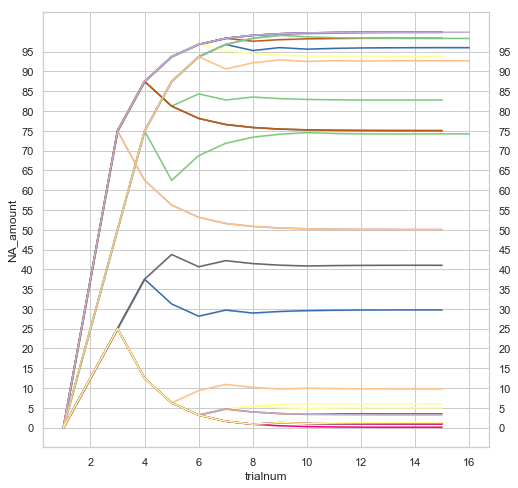

In [17]:

##lineplots for each pp, trialnum on x, amount on y, hue/colour is subject identifier

#sns.set_theme(style="darkgrid")


ticks=list(range(0,100,5))
sns.set(style="whitegrid")
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="trialnum", y="NA_amount",markers=True, palette= 'Accent', hue='subject',legend=None, 
             data=prefer_beer)


ax.set(yticks=ticks)
ax.tick_params(labeltop=False, labelright=True)

plt.savefig('fig_preferencebeer')



### preference for non-alcoholic beer

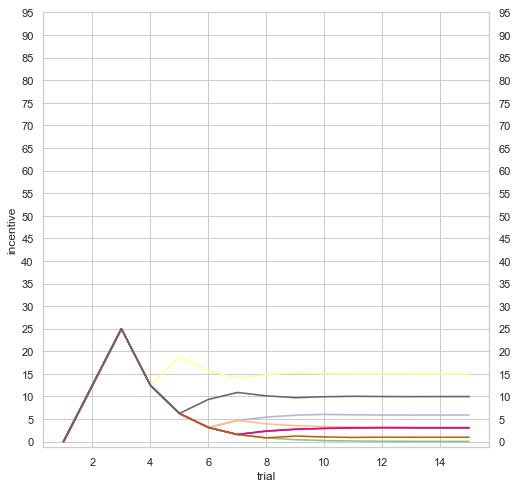

In [18]:

##lineplots for each pp, trialnum on x, amount on y, hue/colour is subject identifier

#sns.set_theme(style="darkgrid")

ticks=list(range(0,100,5))
sns.set(style="whitegrid")
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="trialnum", y="beer_amount",markers=True, palette= 'Accent', hue='subject',legend=None,
             data=prefer_NA)
ax.set(yticks=ticks)
ax.tick_params(labeltop=False, labelright=True)
ax.set_xlabel('trial')
ax.set_ylabel('incentive')

plt.savefig('fig_preferenceNA')


### Progression of chocies


| ![participants who prefer NA](fig_preferenceNA.png) | ![participants whoprefer beer](fig_preferencebeer.png) |
| --- | --- |



In [19]:
#****************************************************************************************************************************
#merge preference datasets with  ddt

merge_01=pd.merge(prefer_beer, ddt,on='subject')


merge_02=pd.merge(merge_01, code, on='subject')


full_beer=merge_02




In [20]:
#merge preference datasets with  ddt

merge_11=pd.merge(prefer_NA, ddt,on='subject')


merge_12=pd.merge(merge_11, code, on='subject')
#print(merge_12)

full_NA=merge_12

In [21]:
#check for missing data and remove stuff.....be careful here and check how the data looks

#full_NA.isnull().sum()  #no missing values
#full_beer.isnull().sum()

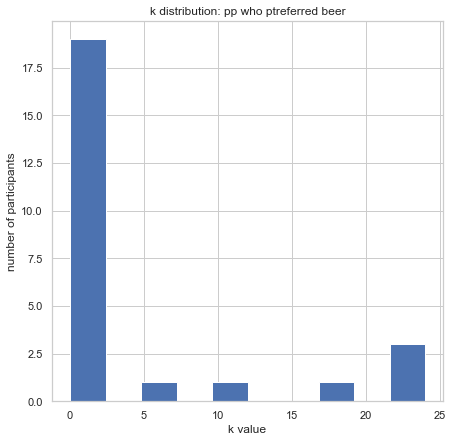

In [22]:

# k values: distribution,min,max, average

#into wide format?
full_beer_k=full_beer[['subject', 'values.k', 'NA_amount']]
full_beer_wide=full_beer_k.pivot_table(index='subject',
                                    values='values.k').reset_index()

#plot k distribution for pp who chose beer:

fig, ax = plt.subplots(figsize=[7, 7])
ax.hist(x=full_beer_wide['values.k'], bins= 10,density=False)
ax.set_xlabel('k value')
ax.set_ylabel('number of participants')
ax.set_title(r'k distribution: pp who ptreferred beer')

plt.savefig('k_dist_beer')



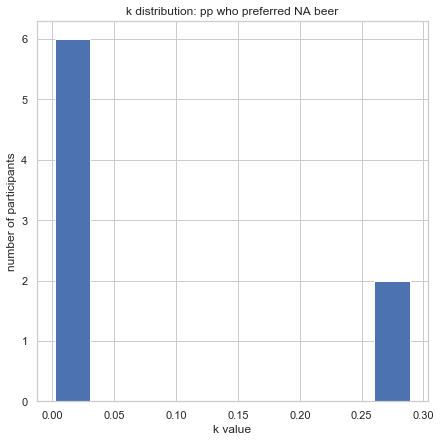

In [23]:
# k values: distribution,min,max, average

#into wide format?
full_NA_k=full_NA[['subject', 'values.k', 'beer_amount']]
full_NA_wide=full_NA_k.pivot_table(index='subject',
                                    values='values.k').reset_index()

#plot k distribution for pp who chose beer:

fig, ax = plt.subplots(figsize=[7, 7])
ax.hist(x=full_NA_wide['values.k'], bins= 10,density=False)
ax.set_xlabel('k value')
ax.set_ylabel('number of participants')
ax.set_title(r'k distribution: pp who preferred NA beer') 
plt.savefig('k_dist_NA')

|![](k_dist_beer.png) | ![](k_dist_NA.png)|
|---|---|

In [24]:

# distribution of final amounts --> thismust be doen separately for beer and NA datasets


last_NA= full_NA[full_NA['trialnum']==15] #checked and is fine (duplicated....)
last_NA=last_NA.drop_duplicates()


### relationship between impulsivity and final incentive

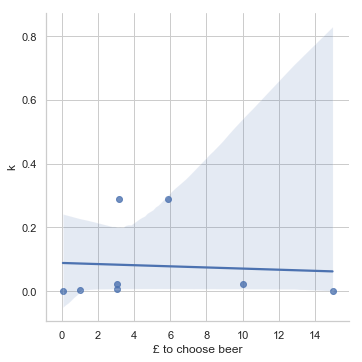

In [25]:
#plot relationship between last trial beer amount and values.k
ax= sns.lmplot(data=last_NA, x="beer_amount", y="values.k")
ax.set_axis_labels('£ to choose beer', 'k')


In [28]:



lastTrials=[15,16]

beer_last=full_beer[full_beer.trialnum.isin(lastTrials)]
beer_last=beer_last.drop_duplicates(subset='subject', keep='last').reset_index()

#last trial dataset with those who prefer beer 


    

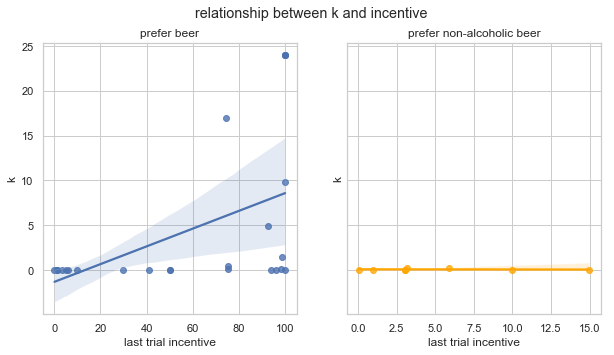

In [29]:

#plot relationship between last trial NA amount and values.k


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('relationship between k and incentive ')
ax1.set_title('prefer beer')
ax2.set_title('prefer non-alcoholic beer')

sns.regplot(ax=ax1, data=beer_last, x="NA_amount", y="values.k")
ax1.set_ylabel('k')
ax1.set_xlabel('last trial incentive')   

sns.regplot(ax=ax2, data=last_NA, x="beer_amount", y="values.k", color= 'orange')
ax2.set_xlabel('last trial incentive')
ax2.set_ylabel('k')


plt.savefig('impulsivity')


<img src="impulsivity.png">

In [30]:
# pp total:33
# first choice NA:13
# confirmed NA preference:8
# beer preference :25

#how many pp chose incentivised choice in the lasttrial
#-- look at last trial data in each dataset and count how many responses 'beer'/non-alcoholic beer are there
#beer last and last_NA

mot_choiceB=sum(beer_last['response']=='non-alcoholic')
mot_choiceB_perc=(mot_choiceB/beer_last.shape[0])*100


mot_choiceNA=sum(last_NA['response']=='beer_n')
mot_choiceNA_perc=(mot_choiceNA/last_NA.shape[0])*100


mot_total=mot_choiceB + mot_choiceNA
mot_total_perc=(mot_total/(last_NA.shape[0]+beer_last.shape[0]))*100


